# Used Car Regression Project
## 중고차 가격 예측 회귀 분석

#### features (11개)
- Location: 위치
- Year: 연도
- Kilometers_Driven: 주행 거리
- Fuel_Type: 연료 종류
- Transmission: 변속기 종류
- Owner_Type: 소유자 유형
- Mileage: 연비
- Engine: 엔진
- Power: 출력
- Seats: 좌석
- New_Price: 새 차 가격

#### targets
- Price: 가격

In [1]:
import pandas as pd

# 데이터 호출
c_df = pd.read_csv('./datasets/car_train.csv', low_memory=False)
c_df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [2]:
import matplotlib.pyplot as plt

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## Ⅰ. 데이터 탐색

#### 📊 데이터 탐색

In [3]:
# 데이터 정보 확인
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
columns = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

for column in columns:
    print(c_df[column].value_counts())
    print('*' * 50, '\n')

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1876, dtype: int64
************************************************** 

Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64
************************************************** 

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64
************************************************** 

Transmission
Manual       4299
Automatic    17

## Ⅱ. 전처리

#### 📊 불필요한 피처 제거

In [5]:
# 불필요한 피처 제거
pre_c_df = c_df.drop(labels=['Unnamed: 0', 'New_Price', 'Location', 'Name'], axis=1)
pre_c_df

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


#### 📊 데이터 결측치

In [6]:
# 결측치 확인
pre_c_df.isna().sum()

Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [7]:
# 결측치 제거
pre_c_df = pre_c_df [~pre_c_df.Engine.isna()]
pre_c_df = pre_c_df [~pre_c_df.Mileage.isna()]
pre_c_df = pre_c_df [~pre_c_df.Seats.isna()]
# 결측치 확인
pre_c_df.isna().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

#### 📊 연도 별 매출

In [8]:
group_c_df = pre_c_df[['Year', 'Price']].groupby('Year').sum('Pirce').reset_index()
group_c_df

,Year,Price
0,1998,5.73
1,1999,1.67
2,2000,4.70
3,2001,11.65
4,2002,17.56
5,2003,24.47
6,2004,56.75
7,2005,112.18
8,2006,256.06
9,2007,395.80


In [9]:
# 날짜 형식 변환
group_c_df['Year'] = pd.to_datetime(group_c_df['Year'], format='%Y')

# 연도만 남기고, 나머지 정보는 버림
group_c_df['Year'] = group_c_df['Year'].dt.year

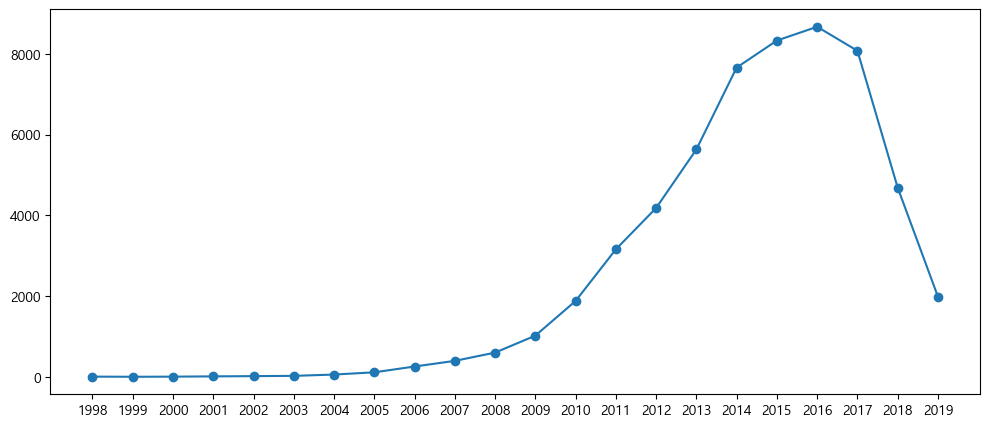

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(12, 5))

# 그래프 그리기
plt.scatter(group_c_df.Year, group_c_df.Price)
plt.plot(group_c_df.Year, group_c_df.Price)

# x 축에 연도만 표시하도록 설정
plt.xticks(group_c_df.Year)

plt.show()

In [11]:
# 연도 피처 제거
pre_c_df = pre_c_df.drop(labels='Year', axis=1).reset_index(drop=True)
pre_c_df

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...
5970,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


#### 📊 null 확인

#### ❗ 이슈
<code>pre_c_df.Power = pre_c_df.Power.apply(lambda x: float(x.split(' ')[0]))</code>

ValueError: could not convert string to float: 'null'

#### 💡 해결
isna로 결측치 확인 당시 결측치가 없다고 출력되었지만, 형변환 때 null 값이 발견됨.
해당 null 값 확인 후 제거 필요.

In [12]:
# null 값 확인
pre_c_df.isnull().sum()

Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [13]:
# null 값이 없는 것으로 보여져 전체 데이터 확인
pre_c_df.Power.unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [14]:
# null bhp 데이터 확인
display(pre_c_df[pre_c_df.Power == 'null bhp'])

# null bhp 제거
pre_c_df = pre_c_df[~ (pre_c_df.Power == 'null bhp')].reset_index(drop=True)

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,2.00
79,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30
89,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,2.10
120,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85
143,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67
...,...,...,...,...,...,...,...,...,...
5818,79000,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,1.85
5830,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,1.20
5881,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,2.85
5899,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,1.70


#### 📊 형변환

In [15]:
import numpy as np

pre_c_df.Mileage = pre_c_df.Mileage.apply(lambda x: float(x.split(' ')[0]))
pre_c_df.Engine = pre_c_df.Engine.apply(lambda x: int(x.split(' ')[0]))
pre_c_df.Power = pre_c_df.Power.apply(lambda x: float(x.split(' ')[0]))
pre_c_df.Seats = pre_c_df.Seats.astype(np.int8)

print(pre_c_df.info())
pre_c_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  5872 non-null   int64  
 1   Fuel_Type          5872 non-null   object 
 2   Transmission       5872 non-null   object 
 3   Owner_Type         5872 non-null   object 
 4   Mileage            5872 non-null   float64
 5   Engine             5872 non-null   int64  
 6   Power              5872 non-null   float64
 7   Seats              5872 non-null   int8   
 8   Price              5872 non-null   float64
dtypes: float64(3), int64(2), int8(1), object(3)
memory usage: 372.9+ KB
None


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...
5867,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
5868,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
5869,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
5870,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


#### 📊 피처와 타겟 간 분포

In [16]:
import matplotlib.pyplot as plt

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

C:\Users\LEGION\AppData\Local\Temp\ipykernel_14508\3421533335.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0][0].scatter(x='Kilometers_Driven', y='Price', data=pre_c_df, c=outer_colors[0], edgecolor='black')
C:\Users\LEGION\AppData\Local\Temp\ipykernel_14508\3421533335.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0][1].scatter(x='Mileage', y='Price', data=pre_c_df, c=outer_colors[1], edgecolor='black')
C:

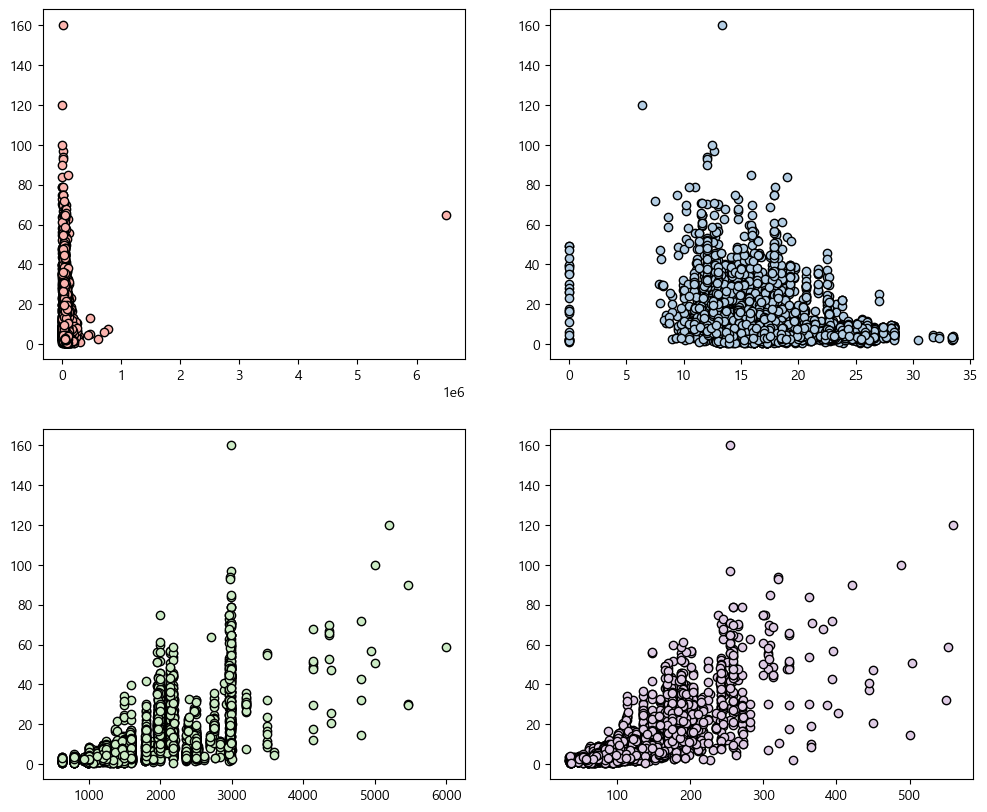

In [17]:
import matplotlib.pyplot as plt

# 그래프 사이즈 설정
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0][0].scatter(x='Kilometers_Driven', y='Price', data=pre_c_df, c=outer_colors[0], edgecolor='black')
ax[0][1].scatter(x='Mileage', y='Price', data=pre_c_df, c=outer_colors[1], edgecolor='black')

ax[1][0].scatter(x='Engine', y='Price', data=pre_c_df, c=outer_colors[2], edgecolor='black')
ax[1][1].scatter(x='Power', y='Price', data=pre_c_df, c=outer_colors[3], edgecolor='black')

plt.show()

#### 📊 데이터 분포

array([[<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Power'}>],
       [<Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

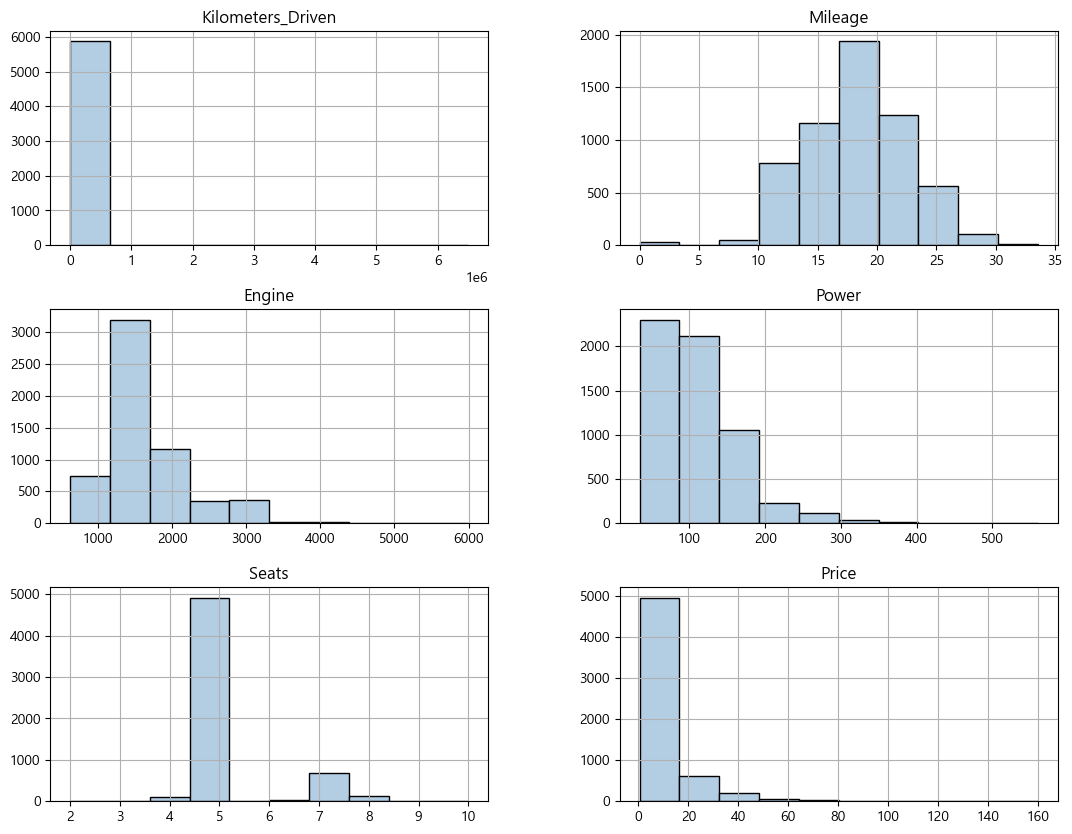

In [18]:
pre_c_df.hist(figsize=(13, 10), color=cmap(np.array([1])), edgecolor='black')

#### 📊 LabelEncoder

In [19]:
enc_c_df = pre_c_df.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder

# 문자열 컬럼 추출
columns = ['Transmission', 'Owner_Type']
# 각 컬럼의 LabelEncoder 객체를 저장할 딕셔너리(encoders) 초기화
label_encoders = {}

# 컬럼 반복하여 column에 담아 적용:
for column in columns:
    # LabelEncoder 객체 생성, 문자열 데이터 인코딩을 통해 정수로 형변환 후 데이터 교체
    encoder = LabelEncoder()
    # LabelEncoder를 사용하여 각 컬럼의 값을 변환
    result = encoder.fit_transform(enc_c_df[column])
    # 변환된 값의 클래스(고유한 값) 저장
    label_encoders[column] = encoder.classes_
    # 변환된 값 적용
    enc_c_df[column] = result

# 교유한 값 확인
label_encoders

{'Transmission': array(['Automatic', 'Manual'], dtype=object),
 'Owner_Type': array(['First', 'Fourth & Above', 'Second', 'Third'], dtype=object)}

#### 📊 OneHotEncoder

In [21]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# OneHotEncoder 객체 생성
# sparse를 False로 설정하면 넘파이 배열, True는 희소 행렬
one_hot_encoder = OneHotEncoder(sparse_output=False)
# 특정 컬럼 변환
result = one_hot_encoder.fit_transform(enc_c_df[['Fuel_Type']])

# 데이터 프레입 병합
# result 결과 데이터 프레임으로 변환 후, 각 열에 해당하는 범주형 변수의 카테고리를 컬럼으로 가지게 함.
enc_c_df = pd.concat([enc_c_df, 
                      pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], 
                     axis=1)
enc_c_df

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,"(CNG,)","(Diesel,)","(LPG,)","(Petrol,)"
0,72000,CNG,1,0,26.60,998,58.16,5,1.75,1,0,0,0
1,41000,Diesel,1,0,19.67,1582,126.20,5,12.50,0,1,0,0
2,46000,Petrol,1,0,18.20,1199,88.70,5,4.50,0,0,0,1
3,87000,Diesel,1,0,20.77,1248,88.76,7,6.00,0,1,0,0
4,40670,Diesel,0,2,15.20,1968,140.80,5,17.74,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,27365,Diesel,1,0,28.40,1248,74.00,5,4.75,0,1,0,0
5868,100000,Diesel,1,0,24.40,1120,71.00,5,4.00,0,1,0,0
5869,55000,Diesel,1,2,14.00,2498,112.00,8,2.90,0,1,0,0
5870,46000,Petrol,1,0,18.90,998,67.10,5,2.65,0,0,0,1


#### 📊 특정 피처 제거

In [22]:
# 사용이 완료된 피처 제거
enc_c_df = enc_c_df.drop(columns='Fuel_Type', axis=1)

#### 📊 컬럼명 변경

In [23]:
# 컬럼명 변경
enc_c_df.columns = ['Kilometers_Driven',
                   'Transmission',
                    'Owner_Type',
                    'Mileage',
                    'Engine',
                    'Power',
                    'Seats',
                    'Price',
                    'CNG',
                    'Diesel',
                    'LPG',
                    'Petrol']

enc_c_df

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,CNG,Diesel,LPG,Petrol
0,72000,1,0,26.60,998,58.16,5,1.75,1,0,0,0
1,41000,1,0,19.67,1582,126.20,5,12.50,0,1,0,0
2,46000,1,0,18.20,1199,88.70,5,4.50,0,0,0,1
3,87000,1,0,20.77,1248,88.76,7,6.00,0,1,0,0
4,40670,0,2,15.20,1968,140.80,5,17.74,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,27365,1,0,28.40,1248,74.00,5,4.75,0,1,0,0
5868,100000,1,0,24.40,1120,71.00,5,4.00,0,1,0,0
5869,55000,1,2,14.00,2498,112.00,8,2.90,0,1,0,0
5870,46000,1,0,18.90,998,67.10,5,2.65,0,0,0,1


#### 📊 타겟 위치 변경

In [24]:
do_c_df = enc_c_df.copy()

In [25]:
# 'Price' 열을 추출합니다.
price_column = do_c_df.pop('Price')

# 'Price' 열을 데이터프레임의 맨 뒤에 추가합니다.
do_c_df['Price'] = price_column
do_c_df

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Price
0,72000,1,0,26.60,998,58.16,5,1,0,0,0,1.75
1,41000,1,0,19.67,1582,126.20,5,0,1,0,0,12.50
2,46000,1,0,18.20,1199,88.70,5,0,0,0,1,4.50
3,87000,1,0,20.77,1248,88.76,7,0,1,0,0,6.00
4,40670,0,2,15.20,1968,140.80,5,0,1,0,0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,27365,1,0,28.40,1248,74.00,5,0,1,0,0,4.75
5868,100000,1,0,24.40,1120,71.00,5,0,1,0,0,4.00
5869,55000,1,2,14.00,2498,112.00,8,0,1,0,0,2.90
5870,46000,1,0,18.90,998,67.10,5,0,0,0,1,2.65


#### 📊 상관관계

In [26]:
# 상관관계 확인
do_c_df.corr()['Price'].sort_values(ascending=False)[1:]

Power                0.772843
Engine               0.658047
Diesel               0.321035
Seats                0.055547
Kilometers_Driven   -0.008249
LPG                 -0.026132
CNG                 -0.052256
Owner_Type          -0.088584
Petrol              -0.309363
Mileage             -0.341652
Transmission        -0.585623
Name: Price, dtype: float64

<Axes: >

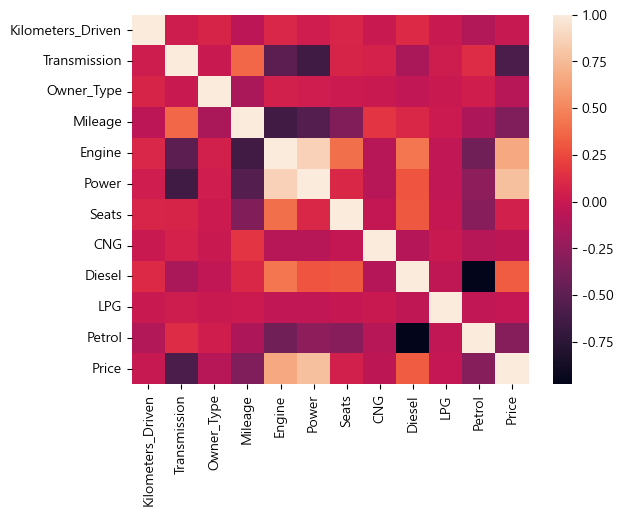

In [27]:
import seaborn as sns

# 히트맵을 통해 상관관계 확인
sns.heatmap(do_c_df.corr())

#### 📊 데이터 분포

array([[<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Owner_Type'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Power'}>],
       [<Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'CNG'}>,
        <Axes: title={'center': 'Diesel'}>],
       [<Axes: title={'center': 'LPG'}>,
        <Axes: title={'center': 'Petrol'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

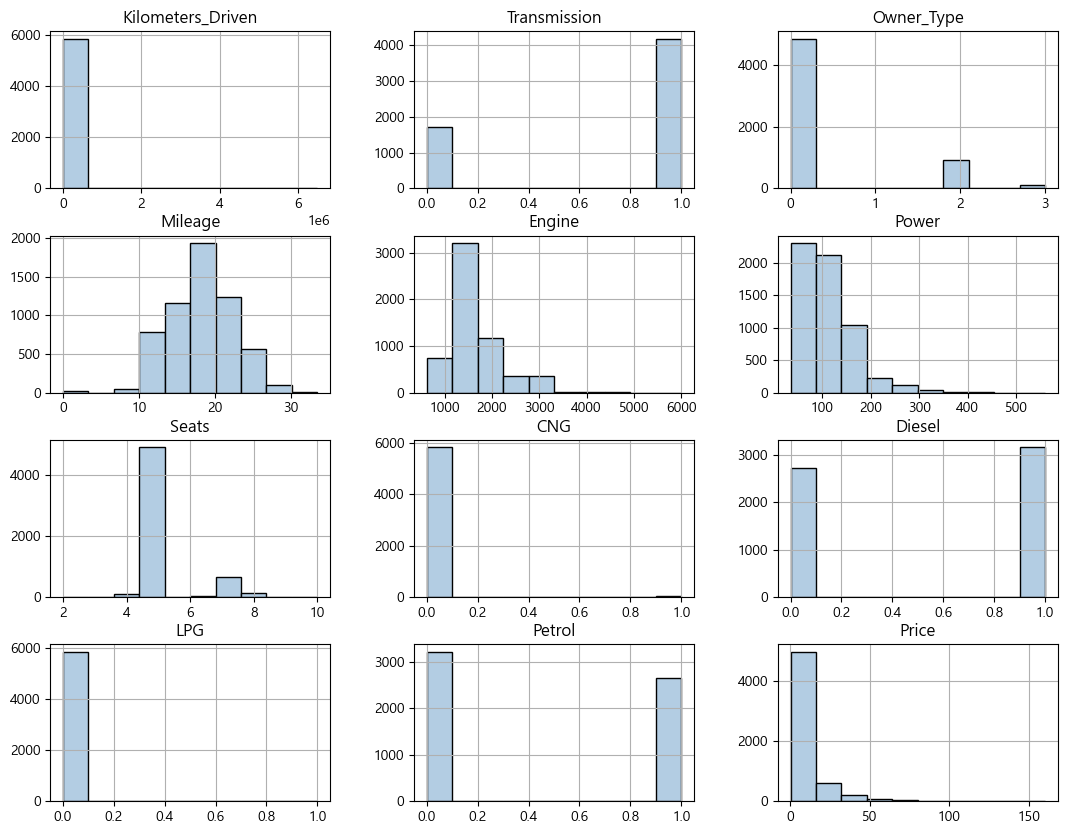

In [28]:
do_c_df.hist(figsize=(13, 10), color=cmap(np.array([1])), edgecolor='black')

## Ⅲ. 분석

### 🌟 1Cycle 

#### 📊 회귀 분석

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = do_c_df.iloc[:, :-1], do_c_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련: 모델이 최적의 가중치와 편향을 학습
l_r.fit(X_train, y_train)

LinearRegression()

In [31]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 55.7774, RMSE: 7.4684, R2: 0.6163


#### 🚩 1Cycle 결과
- 오차가 크며, R2 점수가 이상치 제거하여 R2로 보아 성능이 떨어진다고 판단됨.
- 이상치 제거 후 다시 성능 평가를 하고자 함.

---

### 🌟 2Cycle (이상치 제거)

In [32]:
c2_c_df = do_c_df.copy()

In [33]:
c2_c_df

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Price
0,72000,1,0,26.60,998,58.16,5,1,0,0,0,1.75
1,41000,1,0,19.67,1582,126.20,5,0,1,0,0,12.50
2,46000,1,0,18.20,1199,88.70,5,0,0,0,1,4.50
3,87000,1,0,20.77,1248,88.76,7,0,1,0,0,6.00
4,40670,0,2,15.20,1968,140.80,5,0,1,0,0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,27365,1,0,28.40,1248,74.00,5,0,1,0,0,4.75
5868,100000,1,0,24.40,1120,71.00,5,0,1,0,0,4.00
5869,55000,1,2,14.00,2498,112.00,8,0,1,0,0,2.90
5870,46000,1,0,18.90,998,67.10,5,0,0,0,1,2.65


#### 📊 기술 통계량 확인

In [34]:
# 각 열에 대한 기술 통계량(개수, 평균, 사분위 등) 확인
c2_c_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,5872.0,58316.999149,92169.410006,171.00,33422.5000,52609.00,72402.75,6500000.00
Transmission,5872.0,0.710150,0.453731,0.00,0.0000,1.00,1.00,1.00
Owner_Type,5872.0,0.367847,0.806785,0.00,0.0000,0.00,0.00,3.00
Mileage,5872.0,18.277839,4.365657,0.00,15.2600,18.20,21.10,33.54
Engine,5872.0,1625.745572,601.641783,624.00,1198.0000,1495.50,1991.00,5998.00
Power,5872.0,113.276894,53.881892,34.20,75.0000,97.70,138.10,560.00
Seats,5872.0,5.283719,0.805081,2.00,5.0000,5.00,5.00,10.00
CNG,5872.0,0.009366,0.096334,0.00,0.0000,0.00,0.00,1.00
Diesel,5872.0,0.536785,0.498688,0.00,0.0000,1.00,1.00,1.00
LPG,5872.0,0.001703,0.041236,0.00,0.0000,0.00,0.00,1.00


#### 🚩 결과
- Mileage, Seats 피처는 평균과 중앙값이 거의 유사하므로 별도의 이상치 제거를 진행하지 않음.

#### 📊 이상치 제거

In [35]:
# 이상치 제거할 수치형 컬럼 추출
columns = ['Kilometers_Driven', 'Engine', 'Power', 'Price']

std_c_df = c2_c_df[columns]
std_c_df

,Kilometers_Driven,Engine,Power,Price
0,72000,998,58.16,1.75
1,41000,1582,126.20,12.50
2,46000,1199,88.70,4.50
3,87000,1248,88.76,6.00
4,40670,1968,140.80,17.74
...,...,...,...,...
5867,27365,1248,74.00,4.75
5868,100000,1120,71.00,4.00
5869,55000,2498,112.00,2.90
5870,46000,998,67.10,2.65


In [36]:
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
std = StandardScaler()

# 데이터 표준화 변환
result = std.fit_transform(std_c_df)
# 변환 데이터 새로운 데이터 프레임으로 생성
std_pre_c_df = pd.DataFrame(result, columns=std_c_df.columns)

std_pre_c_df

,Kilometers_Driven,Engine,Power,Price
0,0.148468,-1.043476,-1.023008,-0.698219
1,-0.187898,-0.072717,0.239862,0.257464
2,-0.133646,-0.709362,-0.456164,-0.453742
3,0.311225,-0.627911,-0.455050,-0.320391
4,-0.191479,0.568916,0.510848,0.723304
...,...,...,...,...
5867,-0.335845,-0.627911,-0.729006,-0.431517
5868,0.452282,-0.840681,-0.784688,-0.498193
5869,-0.035991,1.449914,-0.023700,-0.595984
5870,-0.133646,-1.043476,-0.857075,-0.618209


In [37]:
# 초기 조건 설정
# 모든 행을 선택하기 위해 True로 설정
condition = True

# 데이터 프레임의 각 컬럼을 반복:
for column in std_pre_c_df.columns:
    # 각 컬럼의 이상치가 제거된 값을 조건에 담기
    condition &= std_pre_c_df[column].between(-1.96, 1.96)

# 조건에 맞는 값만 가져와 새로운 데이터 프레임 생성
std_pre_c_df = std_pre_c_df[condition]
std_pre_c_df

,Kilometers_Driven,Engine,Power,Price
0,0.148468,-1.043476,-1.023008,-0.698219
1,-0.187898,-0.072717,0.239862,0.257464
2,-0.133646,-0.709362,-0.456164,-0.453742
3,0.311225,-0.627911,-0.455050,-0.320391
4,-0.191479,0.568916,0.510848,0.723304
...,...,...,...,...
5867,-0.335845,-0.627911,-0.729006,-0.431517
5868,0.452282,-0.840681,-0.784688,-0.498193
5869,-0.035991,1.449914,-0.023700,-0.595984
5870,-0.133646,-1.043476,-0.857075,-0.618209


In [38]:
# 인덱스 번호를 대조하여 원본 데이터에도 이상치 제거한 뒤, 인덱스 번호 초기화
c2_c_df = c2_c_df.iloc[std_pre_c_df.index].reset_index(drop=True)
c2_c_df

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Price
0,72000,1,0,26.60,998,58.16,5,1,0,0,0,1.75
1,41000,1,0,19.67,1582,126.20,5,0,1,0,0,12.50
2,46000,1,0,18.20,1199,88.70,5,0,0,0,1,4.50
3,87000,1,0,20.77,1248,88.76,7,0,1,0,0,6.00
4,40670,0,2,15.20,1968,140.80,5,0,1,0,0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5295,27365,1,0,28.40,1248,74.00,5,0,1,0,0,4.75
5296,100000,1,0,24.40,1120,71.00,5,0,1,0,0,4.00
5297,55000,1,2,14.00,2498,112.00,8,0,1,0,0,2.90
5298,46000,1,0,18.90,998,67.10,5,0,0,0,1,2.65


#### 📊 회귀 분석

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = c2_c_df.iloc[:, :-1], c2_c_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련: 모델이 최적의 가중치와 편향을 학습
l_r.fit(X_train, y_train)

LinearRegression()

In [40]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 10.5253, RMSE: 3.2443, R2: 0.6765


#### 🚩 1Cycle 결과
**MSE: 55.7774, RMSE: 7.4684, R2: 0.6163**

#### 🚩 2Cycle 결과
**MSE: 10.5253, RMSE: 3.2443, R2: 0.6765**

#### 💡 분석
- 이상치 제거 결과 R2가 약 0.06 상승하였으며, 오차도 상당히 줄어들었음.

---

### 🌟 3Cycle (표준화)
- 성능 향상을 위해 StandardScaler 진행

In [41]:
c3_c_df = c2_c_df.copy()
c3_c_df

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Price
0,72000,1,0,26.60,998,58.16,5,1,0,0,0,1.75
1,41000,1,0,19.67,1582,126.20,5,0,1,0,0,12.50
2,46000,1,0,18.20,1199,88.70,5,0,0,0,1,4.50
3,87000,1,0,20.77,1248,88.76,7,0,1,0,0,6.00
4,40670,0,2,15.20,1968,140.80,5,0,1,0,0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5295,27365,1,0,28.40,1248,74.00,5,0,1,0,0,4.75
5296,100000,1,0,24.40,1120,71.00,5,0,1,0,0,4.00
5297,55000,1,2,14.00,2498,112.00,8,0,1,0,0,2.90
5298,46000,1,0,18.90,998,67.10,5,0,0,0,1,2.65


In [42]:
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
std = StandardScaler()

# 수치형 데이터 추출
columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

# 표준화 변환
c3_c_df[columns] = std.fit_transform(c3_c_df[columns])

c3_c_df

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Price
0,0.485072,1,0,1.901965,-1.140249,-1.172316,5,1,0,0,0,-0.916373
1,-0.484449,1,0,0.211016,0.190967,0.651070,5,0,1,0,0,0.937163
2,-0.328074,1,0,-0.147670,-0.682074,-0.353883,5,0,0,0,1,-0.442213
3,0.954195,1,0,0.479421,-0.570379,-0.352275,7,0,1,0,0,-0.183580
4,-0.494769,0,2,-0.879683,1.070846,1.042332,5,0,1,0,0,1.840655
...,...,...,...,...,...,...,...,...,...,...,...,...
5295,-0.910881,1,0,2.341173,-0.570379,-0.747824,5,0,1,0,0,-0.399107
5296,1.360768,1,0,1.365156,-0.862152,-0.828220,5,0,1,0,0,-0.528424
5297,-0.046601,1,2,-1.172488,2.278970,0.270528,8,0,1,0,0,-0.718088
5298,-0.328074,1,0,0.023133,-1.140249,-0.932735,5,0,0,0,1,-0.761193


#### 📊 회귀 분석

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = c3_c_df.iloc[:, :-1], c3_c_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련: 모델이 최적의 가중치와 편향을 학습
l_r.fit(X_train, y_train)

LinearRegression()

In [44]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 0.3129, RMSE: 0.5594, R2: 0.6765


#### 🚩 2Cycle 결과
**MSE: 10.5253, RMSE: 3.2443, R2: 0.6765**

#### 🚩 3Cycle 결과
**MSE: 0.3129, RMSE: 0.5594, R2: 0.6765**

#### 💡 분석
- StandardScaler 결과 R2는 동일하게 나타났지만, 오차가 많이 줄어든 것을 확인할 수 있었음.

---

### 🌟 4Cycle (정규화)
- 성능 향상을 위해 MinMaxScaler 진행

In [45]:
c4_c_df = c2_c_df.copy()
c4_c_df

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Price
0,72000,1,0,26.60,998,58.16,5,1,0,0,0,1.75
1,41000,1,0,19.67,1582,126.20,5,0,1,0,0,12.50
2,46000,1,0,18.20,1199,88.70,5,0,0,0,1,4.50
3,87000,1,0,20.77,1248,88.76,7,0,1,0,0,6.00
4,40670,0,2,15.20,1968,140.80,5,0,1,0,0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5295,27365,1,0,28.40,1248,74.00,5,0,1,0,0,4.75
5296,100000,1,0,24.40,1120,71.00,5,0,1,0,0,4.00
5297,55000,1,2,14.00,2498,112.00,8,0,1,0,0,2.90
5298,46000,1,0,18.90,998,67.10,5,0,0,0,1,2.65


In [46]:
from sklearn.preprocessing import MinMaxScaler

# 정규화 객체 생성
min = MinMaxScaler()

# 수치형 데이터 추출
columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

# 정규화 변환
c4_c_df[columns] = min.fit_transform(c4_c_df[columns])

c4_c_df

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Price
0,0.307186,1,0,0.793083,0.174034,0.130359,5,1,0,0,0,0.042109
1,0.174611,1,0,0.586464,0.445789,0.500544,5,0,1,0,0,0.387657
2,0.195994,1,0,0.542636,0.267566,0.296518,5,0,0,0,1,0.130505
3,0.371335,1,0,0.619261,0.290368,0.296844,7,0,1,0,0,0.178721
4,0.173199,0,2,0.453190,0.625407,0.579978,5,0,1,0,0,0.556091
...,...,...,...,...,...,...,...,...,...,...,...,...
5295,0.116299,1,0,0.846750,0.290368,0.216540,5,0,1,0,0,0.138541
5296,0.426932,1,0,0.727490,0.230805,0.200218,5,0,1,0,0,0.114433
5297,0.234483,1,2,0.417412,0.872034,0.423286,8,0,1,0,0,0.079074
5298,0.195994,1,0,0.563506,0.174034,0.178999,5,0,0,0,1,0.071038


#### 📊 회귀 분석

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = c4_c_df.iloc[:, :-1], c4_c_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련: 모델이 최적의 가중치와 편향을 학습
l_r.fit(X_train, y_train)

LinearRegression()

In [48]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 0.0109, RMSE: 0.1043, R2: 0.6765


#### 🚩 3Cycle (StandardScaler) 결과
**MSE: 0.3129, RMSE: 0.5594, R2: 0.6765**

#### 🚩 4Cycle (MinMaxScaler) 결과
**MSE: 0.0109, RMSE: 0.1043, R2: 0.6765**

#### 💡 분석
- MinMaxScaler 결과 StandardScaler와 R2는 동일하게 나타났지만, 오차가 약 0.4 정도 줄어든 것을 확인할 수 있었음.
- MinMaxxScaler로 전처리된 데이터 세트 채택.

---

### 🌟 5Cycle (타겟 분포 변환)

In [49]:
c5_c_df = c4_c_df.copy()

#### 📊 데이터 분포

array([[<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Owner_Type'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Power'}>],
       [<Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'CNG'}>,
        <Axes: title={'center': 'Diesel'}>],
       [<Axes: title={'center': 'LPG'}>,
        <Axes: title={'center': 'Petrol'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

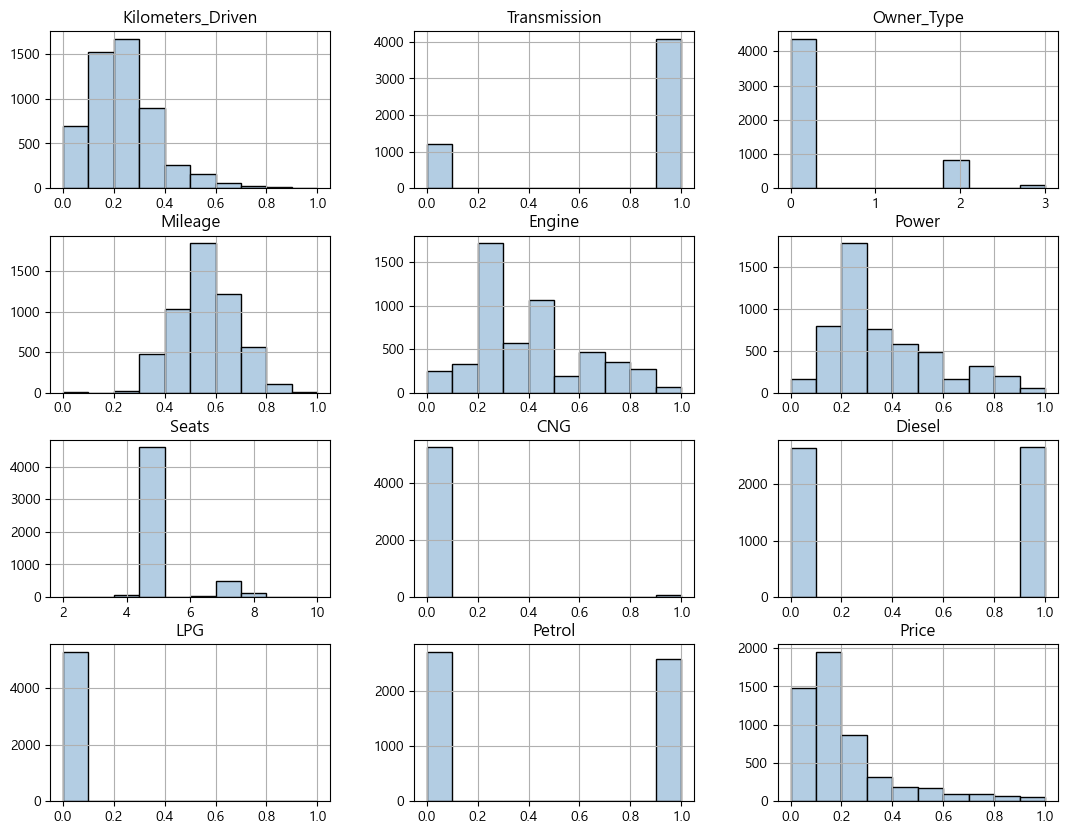

In [50]:
c5_c_df.hist(figsize=(13, 10), color=cmap(np.array([1])), edgecolor='black')

#### 📊 타겟 로그 변환

<Axes: >

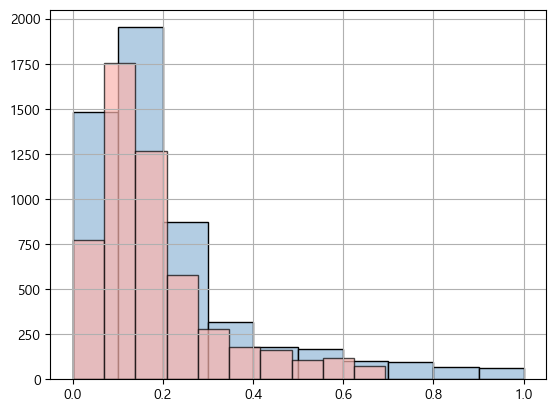

In [51]:
# 타겟 데이터 분포 확인
c5_c_df.Price.hist(color=cmap(np.array([1])), edgecolor='black')
# 타겟 데이터 로그 변환 확인
np.log1p(c5_c_df.Price).hist(color=cmap(np.array([0])), edgecolor='black', alpha=0.7)

#### 📊 PowerTransformer

In [52]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default(★ 추천)

# 객체 생성
# standardize: 표준화 여부
ptf = PowerTransformer(standardize=False)
# 변환 및 대체
c5_c_df['Target_yeo'] = ptf.fit_transform(c5_c_df[['Price']])
c5_c_df

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Price,Target_yeo
0,0.307186,1,0,0.793083,0.174034,0.130359,5,1,0,0,0,0.042109,0.037420
1,0.174611,1,0,0.586464,0.445789,0.500544,5,0,1,0,0,0.387657,0.165098
2,0.195994,1,0,0.542636,0.267566,0.296518,5,0,0,0,1,0.130505,0.092707
3,0.371335,1,0,0.619261,0.290368,0.296844,7,0,1,0,0,0.178721,0.113711
4,0.173199,0,2,0.453190,0.625407,0.579978,5,0,1,0,0,0.556091,0.183383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,0.116299,1,0,0.846750,0.290368,0.216540,5,0,1,0,0,0.138541,0.096572
5296,0.426932,1,0,0.727490,0.230805,0.200218,5,0,1,0,0,0.114433,0.084481
5297,0.234483,1,2,0.417412,0.872034,0.423286,8,0,1,0,0,0.079074,0.063752
5298,0.195994,1,0,0.563506,0.174034,0.178999,5,0,0,0,1,0.071038,0.058470


<Axes: >

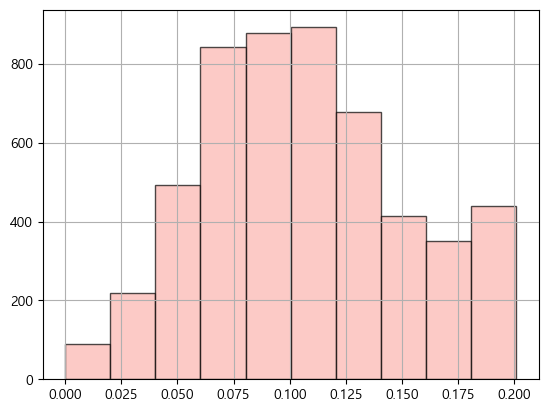

In [53]:
# 타겟 분포 변환 확인
c5_c_df.Target_yeo.hist(color=cmap(np.array([0])), edgecolor='black', alpha=0.7)

#### 🚩 결과
- log 변환 보다 PowerTransformer(yeo-johnson) 변환 분포가 더 균일한 것을 확인함.

#### 📊 기존 타겟 제거
- 데이터 분포 변환을 진행했기 때문에 기존 타겟은 제거

In [54]:
c5_c_df = c5_c_df.drop(labels='Price', axis=1)
c5_c_df

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Target_yeo
0,0.307186,1,0,0.793083,0.174034,0.130359,5,1,0,0,0,0.037420
1,0.174611,1,0,0.586464,0.445789,0.500544,5,0,1,0,0,0.165098
2,0.195994,1,0,0.542636,0.267566,0.296518,5,0,0,0,1,0.092707
3,0.371335,1,0,0.619261,0.290368,0.296844,7,0,1,0,0,0.113711
4,0.173199,0,2,0.453190,0.625407,0.579978,5,0,1,0,0,0.183383
...,...,...,...,...,...,...,...,...,...,...,...,...
5295,0.116299,1,0,0.846750,0.290368,0.216540,5,0,1,0,0,0.096572
5296,0.426932,1,0,0.727490,0.230805,0.200218,5,0,1,0,0,0.084481
5297,0.234483,1,2,0.417412,0.872034,0.423286,8,0,1,0,0,0.063752
5298,0.195994,1,0,0.563506,0.174034,0.178999,5,0,0,0,1,0.058470


#### 📊 회귀 분석

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = c5_c_df.iloc[:, :-1], c5_c_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련: 모델이 최적의 가중치와 편향을 학습
l_r.fit(X_train, y_train)

LinearRegression()

In [56]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 0.0006, RMSE: 0.0247, R2: 0.6898


#### 🚩 4Cycle (MinMaxScaler) 결과
**MSE: 0.0109, RMSE: 0.1043, R2: 0.6765**

#### 🚩 5Cycle (PowerTransformer) 결과
**MSE: 0.0006, RMSE: 0.0247, R2: 0.6898**

#### 💡 분석
- 타겟 분포 변환 결과 R2가 약 0.01 상승했으며, 오차가 상당히 줄어든 것을 확인함.

---

### 🌟 6Cycle (피처 분포 변환)

In [57]:
c6_c_df = c5_c_df.copy()
c6_c_df

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Target_yeo
0,0.307186,1,0,0.793083,0.174034,0.130359,5,1,0,0,0,0.037420
1,0.174611,1,0,0.586464,0.445789,0.500544,5,0,1,0,0,0.165098
2,0.195994,1,0,0.542636,0.267566,0.296518,5,0,0,0,1,0.092707
3,0.371335,1,0,0.619261,0.290368,0.296844,7,0,1,0,0,0.113711
4,0.173199,0,2,0.453190,0.625407,0.579978,5,0,1,0,0,0.183383
...,...,...,...,...,...,...,...,...,...,...,...,...
5295,0.116299,1,0,0.846750,0.290368,0.216540,5,0,1,0,0,0.096572
5296,0.426932,1,0,0.727490,0.230805,0.200218,5,0,1,0,0,0.084481
5297,0.234483,1,2,0.417412,0.872034,0.423286,8,0,1,0,0,0.063752
5298,0.195994,1,0,0.563506,0.174034,0.178999,5,0,0,0,1,0.058470


#### 📊 데이터 분포

array([[<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Owner_Type'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Power'}>],
       [<Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'CNG'}>,
        <Axes: title={'center': 'Diesel'}>],
       [<Axes: title={'center': 'LPG'}>,
        <Axes: title={'center': 'Petrol'}>,
        <Axes: title={'center': 'Target_yeo'}>]], dtype=object)

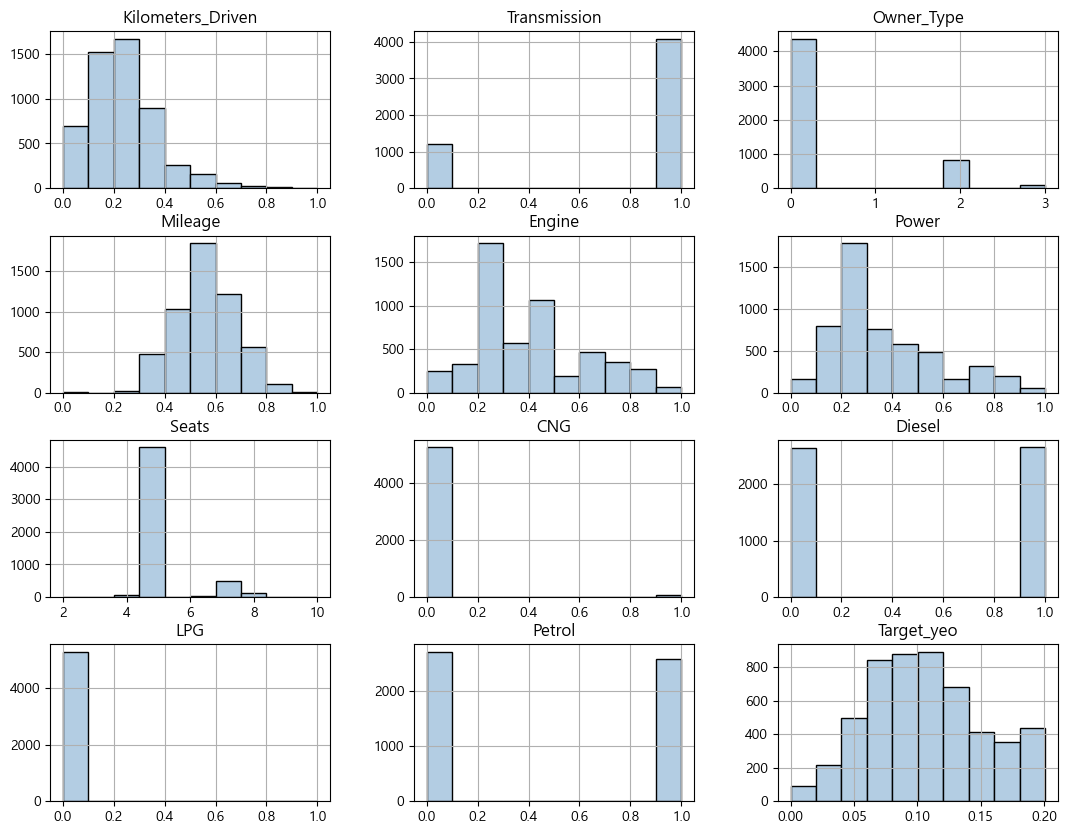

In [58]:
# 분포 확인
c6_c_df.hist(figsize=(13, 10), color=cmap(np.array([1])), edgecolor='black')

#### 🚩 결과
- 수치형 데이터 중 분포가 균일하지 않은 Engine, Power 피처를 변환하고자 함.

#### 📊 피처 로그 변환

<Axes: >

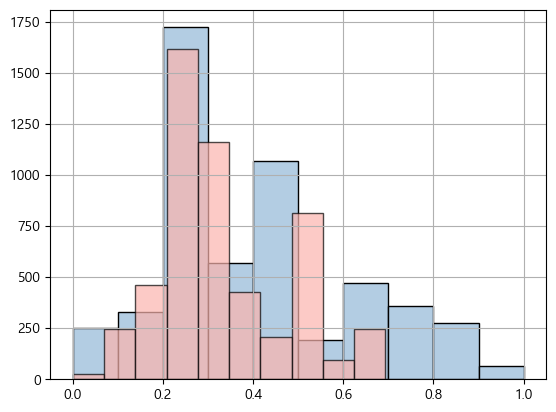

In [59]:
# 타겟 데이터 분포 확인
c6_c_df.Engine.hist(color=cmap(np.array([1])), edgecolor='black')
# 타겟 데이터 로그 변환 확인
np.log1p(c6_c_df.Engine).hist(color=cmap(np.array([0])), edgecolor='black', alpha=0.7)

<Axes: >

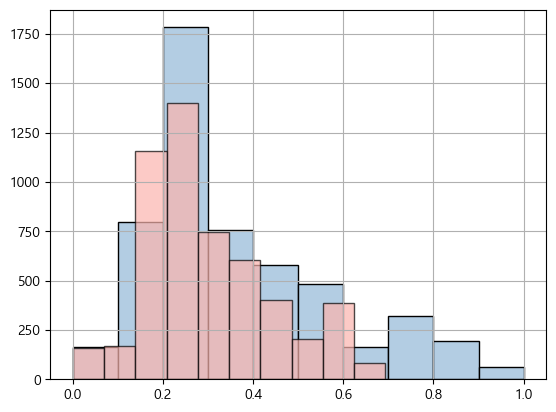

In [60]:
# 타겟 데이터 분포 확인
c6_c_df.Power.hist(color=cmap(np.array([1])), edgecolor='black')
# 타겟 데이터 로그 변환 확인
np.log1p(c6_c_df.Power).hist(color=cmap(np.array([0])), edgecolor='black', alpha=0.7)

#### 📊 PowerTransformer

In [61]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default(★ 추천)

columns = ['Engine', 'Power']

# 객체 생성
# standardize: 표준화 여부
ptf = PowerTransformer(standardize=False)

# 변환 및 대체
for column in columns:
    c6_c_df[column] = ptf.fit_transform(c6_c_df[[column]])

c6_c_df

,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Target_yeo
0,0.307186,1,0,0.793083,0.143913,0.108903,5,1,0,0,0,0.037420
1,0.174611,1,0,0.586464,0.288897,0.279682,5,0,1,0,0,0.165098
2,0.195994,1,0,0.542636,0.202192,0.203407,5,0,0,0,1,0.092707
3,0.371335,1,0,0.619261,0.214885,0.203558,7,0,1,0,0,0.113711
4,0.173199,0,2,0.453190,0.353882,0.301785,5,0,1,0,0,0.183383
...,...,...,...,...,...,...,...,...,...,...,...,...
5295,0.116299,1,0,0.846750,0.214885,0.162684,5,0,1,0,0,0.096572
5296,0.426932,1,0,0.727490,0.180543,0.153370,5,0,1,0,0,0.084481
5297,0.234483,1,2,0.417412,0.419499,0.254584,8,0,1,0,0,0.063752
5298,0.195994,1,0,0.563506,0.143913,0.140686,5,0,0,0,1,0.058470


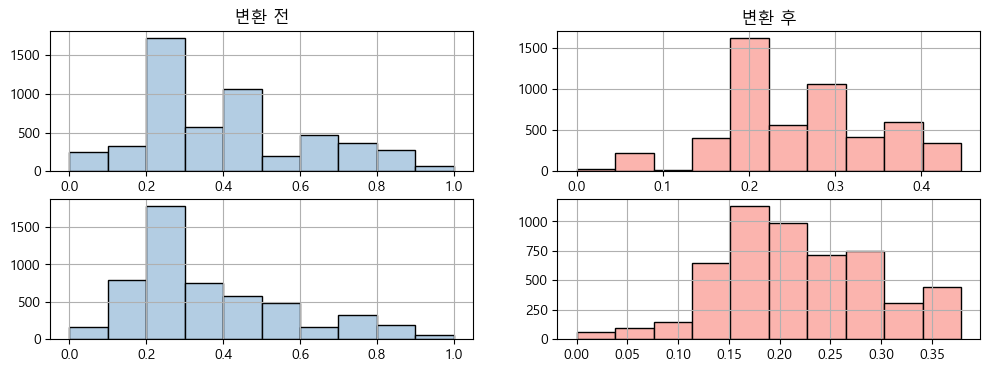

In [62]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
fig, ax = plt.subplots(2, 2, figsize=(12, 4))

# 타겟 분포 변환 확인
ax[0][0].hist(x=c5_c_df.Engine, color=cmap(np.array([1])), edgecolor='black')
ax[0][0].grid(True)
ax[0][0].set_title('변환 전')
ax[0][1].hist(x=c6_c_df.Engine, color=cmap(np.array([0])), edgecolor='black')
ax[0][1].grid(True)
ax[0][1].set_title('변환 후')

ax[1][0].hist(x=c5_c_df.Power, color=cmap(np.array([1])), edgecolor='black')
ax[1][0].grid(True)
ax[1][1].hist(x=c6_c_df.Power, color=cmap(np.array([0])), edgecolor='black')
ax[1][1].grid(True)

plt.show()

#### 🚩 결과
- 분포 변환 결과가 거의 유사한 것을 확인하며, 해당 데이터에 대한 분포 변환이 효과적이지 않다고 판단됨.

#### 📊 회귀 분석

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = c6_c_df.iloc[:, :-1], c6_c_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련: 모델이 최적의 가중치와 편향을 학습
l_r.fit(X_train, y_train)

LinearRegression()

In [64]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 0.0006, RMSE: 0.0244, R2: 0.6970


#### 🚩 5Cycle (Target - PowerTransformer) 결과
**MSE: 0.0006, RMSE: 0.0247, R2: 0.6898**

#### 🚩 6Cycle (Features - PowerTransformer) 결과
**MSE: 0.0006, RMSE: 0.0244, R2: 0.6970**

#### 💡 분석
- 피처 분포 변환 결과 예상대로 변환 전, 후 큰 차이가 없다는 것을 확인함.
- 하지만, 미약하게라도 R2 상승 및 오차 감소에 따라 해당 데이터를 사용하고자 함.

---

### 🌟 7Cycle (OLS, VIF)

#### 📊 OLS

In [65]:
c7_c_df = c6_c_df.copy()

In [66]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 세트 분리
features, targets = c7_c_df.iloc[:, :-1], c7_c_df.iloc[:, -1]

# OLS 객체 생성
model = OLS(targets, features)
# 훈련 및 정보 출력
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:             Target_yeo   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1294.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:22:55   Log-Likelihood:                 12187.
No. Observations:                5300   AIC:                        -2.435e+04
Df Residuals:                    5289   BIC:                        -2.428e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Kilometers_Driven    -0.0864      0.00

#### 📊 VIF

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [68]:
# VIF 확인
get_vif(features)

,vif_score,feature
0,1.298492,Kilometers_Driven
1,1.535604,Transmission
2,1.097200,Owner_Type
3,2.944756,Mileage
4,8.964513,Engine
5,5.716034,Power
6,1.636188,Seats
7,3.978773,CNG
8,145.908033,Diesel
9,1.399685,LPG


#### 📊 상관관계

In [69]:
# 상관관계 확인
c7_c_df.corr()['Target_yeo'].sort_values(ascending=False)[1:]

Power                0.723552
Engine               0.627373
Diesel               0.406322
Seats                0.204564
LPG                 -0.050913
CNG                 -0.074970
Mileage             -0.187858
Kilometers_Driven   -0.189951
Owner_Type          -0.199593
Petrol              -0.386832
Transmission        -0.517350
Name: Target_yeo, dtype: float64

<Axes: >

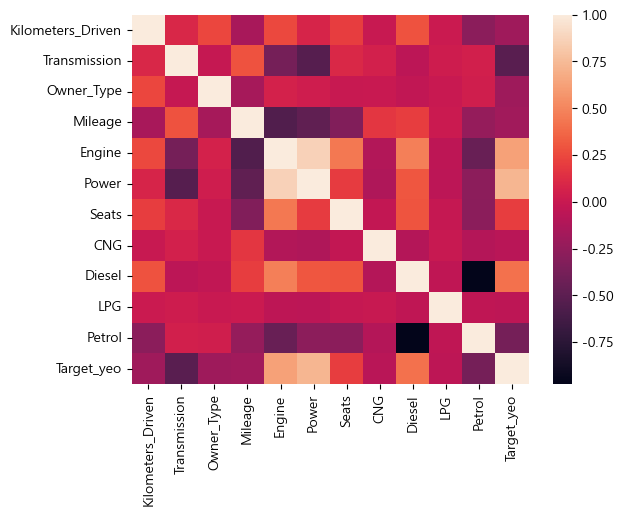

In [70]:
import seaborn as sns

# 히트맵을 통해 상관관계 확인
sns.heatmap(c7_c_df.corr())

#### 🚩 결과
- 다중 공산성이 높게 나타남에 따라 타겟과 상관관계가 낮은 피처를 제거함.

#### 📊 상관관계에 따른 피처 제거

In [71]:
# 타겟과 상관관계가 낮은 피처 제거
columns = ['Seats', 'LPG', 'CNG', 'Mileage', 'Kilometers_Driven', 'Owner_Type', 'Petrol']

c7_c_df = c7_c_df.drop(columns=columns, axis=1)
c7_c_df

,Transmission,Engine,Power,Diesel,Target_yeo
0,1,0.143913,0.108903,0,0.037420
1,1,0.288897,0.279682,1,0.165098
2,1,0.202192,0.203407,0,0.092707
3,1,0.214885,0.203558,1,0.113711
4,0,0.353882,0.301785,1,0.183383
...,...,...,...,...,...
5295,1,0.214885,0.162684,1,0.096572
5296,1,0.180543,0.153370,1,0.084481
5297,1,0.419499,0.254584,1,0.063752
5298,1,0.143913,0.140686,0,0.058470


#### 📊 OLS

In [72]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 세트 분리
features, targets = c7_c_df.iloc[:, :-1], c7_c_df.iloc[:, -1]

# OLS 객체 생성
model = OLS(targets, features)
# 훈련 및 정보 출력
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          1.867e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        18:22:55   Log-Likelihood:                          11089.
No. Observations:                5300   AIC:                                 -2.217e+04
Df Residuals:                    5296   BIC:                                 -2.214e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

#### 📊 VIF

In [73]:
# VIF 확인
get_vif(features)

,vif_score,feature
0,2.523625,Transmission
1,47.713947,Engine
2,38.520376,Power
3,2.712826,Diesel


#### 📊 상관관계

In [74]:
# 상관관계 확인
c7_c_df.corr()['Target_yeo'].sort_values(ascending=False)[1:]

Power           0.723552
Engine          0.627373
Diesel          0.406322
Transmission   -0.517350
Name: Target_yeo, dtype: float64

#### 📊 회귀 분석

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = c7_c_df.iloc[:, :-1], c7_c_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련: 모델이 최적의 가중치와 편향을 학습
l_r.fit(X_train, y_train)

LinearRegression()

In [76]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 0.0008, RMSE: 0.0283, R2: 0.5939


#### 🚩 6Cycle (Features - PowerTransformer) 결과
**MSE: 0.0006, RMSE: 0.0244, R2: 0.6970**

#### 🚩 7Cycle (OLS, VIF) 결과
**MSE: 0.0008, RMSE: 0.0283, R2: 0.5939**

#### 💡 분석
- OLS, VIF, 상관관계 확인 후 해소를 위해 피처 제거 시 오히려 성능이 저하되는 것을 확인함.

---

### 🌟 8Cycle (다항 회귀)

In [77]:
c8_c_df = c6_c_df.copy()

In [78]:
from sklearn.preprocessing import PolynomialFeatures

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = c8_c_df.iloc[:, :-1], c8_c_df.iloc[:, -1]

# 차원 확장, 비선형 관계를 모델링
# degree: 차수 조절 (2부터 상승시키기, 기존의 피처를 유지하며 설정한 차수로 만듦)
poly_features = PolynomialFeatures(degree=3).fit_transform(features)

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=0)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련: 모델이 최적의 가중치와 편향을 학습
l_r.fit(X_train, y_train)

LinearRegression()

In [79]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 0.0008, RMSE: 0.0285, R2: 0.6125


#### 🚩 6Cycle (Features - PowerTransformer) 결과
**MSE: 0.0006, RMSE: 0.0244, R2: 0.6970**

#### 🚩 8Cycle (다항 회귀) 결과
- degree=2  
**MSE: 0.0012, RMSE: 0.0343, R2: 0.4385**

- degree=3  
**MSE: 0.0008, RMSE: 0.0285, R2: 0.6125**

- degree=4  
**MSE: 0.0177, RMSE: 0.1332, R2: -7.4634**

#### 💡 분석
- 다항 회귀 시 오히려 성능이 저하되는 것을 확인함.
- 해당 데이터는 비선형 관계가 아닌 선형 관계로 판단됨.

---

### 🌟 9Cycle (회귀 모델)

In [80]:
c9_c_df = c6_c_df.copy()

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = c9_c_df.iloc[:, :-1], c9_c_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=0)

# 회귀 모델
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

# 각 모델 담기
models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

# 반복하여 모델에 대한 다음과 같은 작업 수행:
for model in models:
    # 모델 학습
    model.fit(X_train, y_train)
    # 모델 예측
    prediction = model.predict(X_test)
    # 모델 이름
    print(model.__class__.__name__)
    # 평가
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.0006, RMSE: 0.0242, R2: 0.7203
RandomForestRegressor
MSE: 0.0003, RMSE: 0.0181, R2: 0.8436
GradientBoostingRegressor
MSE: 0.0004, RMSE: 0.0205, R2: 0.7987
XGBRegressor
MSE: 0.0003, RMSE: 0.0177, R2: 0.8510
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 4240, number of used features: 10
[LightGBM] [Info] Start training from score 0.106712
LGBMRegressor
MSE: 0.0003, RMSE: 0.0179, R2: 0.8469


#### 🚩 6Cycle (Features - PowerTransformer) 결과
**MSE: 0.0006, RMSE: 0.0244, R2: 0.6970**

#### 🚩 9Cycle (회귀모델) 결과
- DecisionTreeRegressor  
**MSE: 0.0006, RMSE: 0.0242, R2: 0.7203**

- RandomForestRegressor  
**MSE: 0.0003, RMSE: 0.0181, R2: 0.8436**

- GradientBoostingRegressor  
**MSE: 0.0004, RMSE: 0.0205, R2: 0.7987**

- XGBRegressor  
**MSE: 0.0003, RMSE: 0.0177, R2: 0.8510**

- LGBMRegressor  
**MSE: 0.0003, RMSE: 0.0179, R2: 0.8469**

#### 💡 분석
- 회귀 모델 학습 결과 XGBRegressor 사용했을 때, 성능이 많이 향상한 것을 확인할 수 있음.

---

### 🌟 10Cycle (GridSearchCV)

In [87]:
c10_c_df = c6_c_df.copy()

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = c10_c_df.iloc[:, :-1], c10_c_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 가장 성능이 우수한 모델 담기
xgb_r = XGBRegressor()

# 파라미터 값 조정
parameters = {'learning_rate': [0.1, 0.15, 0.2, 0.3], 'n_estimators': [150, 200, 250]}
# 교차검증
# n_splits: 데이터를 몇 개의 폴드로 나눌지를 결정 (일반적으로 5 또는 10)
# shuffle: 분할 전 데이터 혼합 여부 
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

# 학습 및 교차 검증 모델 설정
grid_xgb_r = GridSearchCV(xgb_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1)

# 훈련
grid_xgb_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.15, 0.2, 0.3],
                         'n_estimators': [150, 200, 250]},
             scoring='neg_mean_squared_error')

In [134]:
# 훈련 결과 확인
result_df = pd.DataFrame(grid_xgb_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.1, 'n_estimators': 150}",-0.000322,3
1,"{'learning_rate': 0.1, 'n_estimators': 200}",-0.000320,2
2,"{'learning_rate': 0.1, 'n_estimators': 250}",-0.000320,1
3,"{'learning_rate': 0.15, 'n_estimators': 150}",-0.000323,4
4,"{'learning_rate': 0.15, 'n_estimators': 200}",-0.000324,5
5,"{'learning_rate': 0.15, 'n_estimators': 250}",-0.000327,7
6,"{'learning_rate': 0.2, 'n_estimators': 150}",-0.000326,6
7,"{'learning_rate': 0.2, 'n_estimators': 200}",-0.000329,8
8,"{'learning_rate': 0.2, 'n_estimators': 250}",-0.000333,9
9,"{'learning_rate': 0.3, 'n_estimators': 150}",-0.000343,10


In [135]:
# 최적의 모델 담기
xgb = grid_xgb_r.best_estimator_
# 예측
prediction = xgb.predict(X_test)

In [136]:
# 평가
get_evaluation(y_test, prediction)

MSE: 0.0003, RMSE: 0.0182, R2: 0.8311


#### 🚩 9Cycle (XGBRegressor) 결과
**MSE: 0.0003, RMSE: 0.0177, R2: 0.8510**

#### 🚩 10Cycle (GridSearchCV) 결과
**MSE: 0.0003, RMSE: 0.0182, R2: 0.8311**

#### 💡 분석
- GridSearchCV 시 오히려 성능이 저하된 것을 확인함. 따라서, XGBRegressor 모델을 사용하는 것이 가장 좋다고 판단됨.